<a href="https://colab.research.google.com/github/PariaNajafi/Apple_RNN/blob/main/Apple_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
# Download historical data for Apple (AAPL)
apple_data = yf.download("AAPL", start="2012-01-01", end="2022-01-01")
closing_prices = apple_data['Close']
apple_close = apple_data.iloc[:, 3:4].values

[*********************100%***********************]  1 of 1 completed


In [ ]:
apple_close.shape, closing_prices.shape, apple_close.dtype , closing_prices.dtype

((2517, 1), (2517,), dtype('float64'), dtype('float64'))

In [ ]:
apple_close[0][0], apple_data['Close'][0]


<ipython-input-47-231406f3deb7>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  apple_close[0][0], apple_data['Close'][0]


(14.686785697937012, 14.686785697937012)

when data is shown in series,(apple_close[0]) or in a dataset apple_data or in an array, <br>

python would not show us the actual number and rounds it down to a specific decimal places!

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
closing_prices.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 2517 entries, 2012-01-03 to 2021-12-31
Series name: Close
Non-Null Count  Dtype  
--------------  -----  
2517 non-null   float64
dtypes: float64(1)
memory usage: 39.3 KB


In [ ]:
closing_prices.isnull().sum()

0

In [ ]:
import matplotlib.pyplot as plt

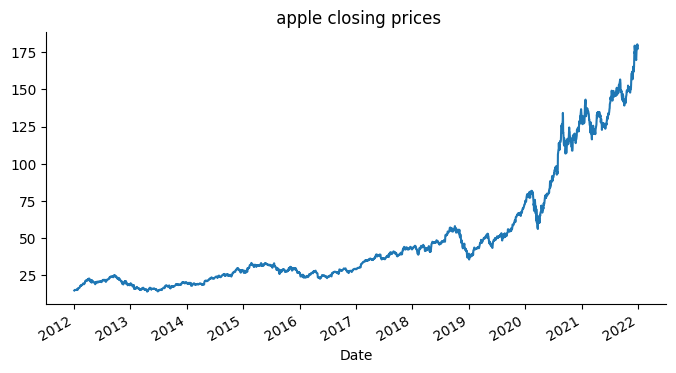

In [ ]:

closing_prices.plot(kind='line', figsize=(8, 4), title=' apple closing prices')
plt.gca().spines[['top', 'right']].set_visible(False)

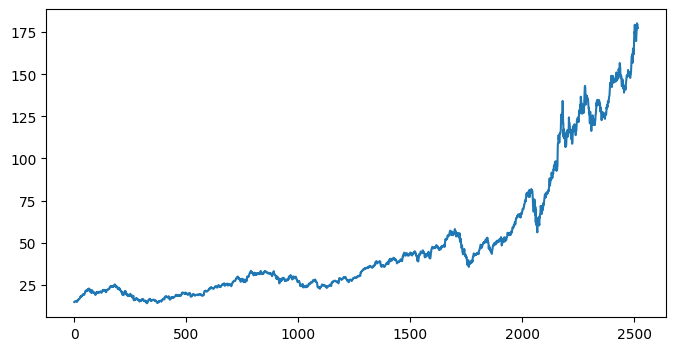

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(apple_close[:])

In [ ]:
#closing_prices = closing_prices.values.astype('float32')

In [ ]:
apple_data[0:30]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.402629,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.469276,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.607709,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.739511,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.719304,394024400
2012-01-10,15.211071,15.214286,15.053571,15.115714,12.764848,258196400
2012-01-11,15.095714,15.101786,14.975357,15.091071,12.744036,215084800
2012-01-12,15.081429,15.103571,14.955357,15.049643,12.709051,212587200
2012-01-13,14.989286,15.016071,14.952143,14.993214,12.661396,226021600


if we want to predict every monday's price, data need some

In [ ]:
apple_data.index.dtype, pd.Index(apple_data.index).dtype

(dtype('<M8[ns]'), dtype('<M8[ns]'))

In [ ]:
# apple_data['datetime'] = apple_data['datetime'].astype(int)
# apple_data['datetime'] = apple_data['datetime'].div(10**9)

In [ ]:
from datetime import datetime, timedelta
start_date = apple_data.index[0]
end_date = apple_data.index[-1]
nb_days = (end_date - start_date).days + 1
dates = [start_date + timedelta(days=x) for x in range(nb_days)]
dates = [d for d in dates if not d.isoweekday() in [6,7]]
time_frame = pd.DataFrame({'Date' : dates})
time_frame = time_frame.set_index('Date')
filled_df = time_frame.merge(apple_data, how='outer', left_index=True, right_index=True, suffixes=('1', '2'))
filled_df.ffill( inplace=True)


In [ ]:
filled_df['week'] = filled_df.index.to_series().apply(lambda x: x.isocalendar().week)

In [ ]:
# filled_df['year'] = filled_df.index.year
# filled_df['month'] = filled_df.index.month

In [ ]:
# filled_df['week_group'] = filled_df.groupby(['week', 'month']).ngroup()

In [ ]:
filled_df[:50]

,Open,High,Low,Close,Adj Close,Volume,week
Date,,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.402629,3.022208e+08,1
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.469276,2.600220e+08,1
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.607709,2.712696e+08,1
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.739511,3.182928e+08,1
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.719304,3.940244e+08,2
2012-01-10,15.211071,15.214286,15.053571,15.115714,12.764848,2.581964e+08,2
2012-01-11,15.095714,15.101786,14.975357,15.091071,12.744036,2.150848e+08,2
2012-01-12,15.081429,15.103571,14.955357,15.049643,12.709051,2.125872e+08,2
2012-01-13,14.989286,15.016071,14.952143,14.993214,12.661396,2.260216e+08,2


In [ ]:
filled_df.columns


Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'week'], dtype='object')

In [ ]:
filled_df.drop(['Open', 'High', 'Low','Adj Close', 'Volume'], axis=1)
filled_df = filled_df[4:]

In [ ]:
week_test = np.reshape(filled_df['week'], (int(filled_df['week'].shape[0]/5), 5))

for i in range(0,week_test.shape[0]):
  if len(set(week_test[i])) == 1 :
    continue
  else:
    print(i)

In [ ]:
mondays = filled_df[filled_df.index.weekday == 0 ]

In [ ]:
filled_df.tail()

,Open,High,Low,Close,Adj Close,Volume,week
Date,,,,,,,
2021-12-27,177.089996,180.419998,177.070007,180.330002,177.618866,74919600.0,52
2021-12-28,180.160004,181.330002,178.529999,179.289993,176.594498,79144300.0,52
2021-12-29,179.330002,180.630005,178.139999,179.380005,176.683167,62348900.0,52
2021-12-30,179.470001,180.570007,178.089996,178.199997,175.520920,59773000.0,52
2021-12-31,178.089996,179.229996,177.259995,177.570007,174.900360,64062300.0,52


In [ ]:
data = filled_df['Close'].values
data = data.reshape(len(data), 1)
scaler = MinMaxScaler((0,1))
data_scaled = scaler.fit_transform(data).flatten()



In [ ]:
time_step=5
indices = np.arange(time_step, len(data_scaled), time_step)
y = data_scaled[indices]

In [ ]:
X = data_scaled[range(len(y)*time_step)]
X = np.reshape(X, (len(y), time_step, 1))

In [ ]:
X.shape,y.shape

((520, 5, 1), (520,))

In [ ]:
if mondays['Close'][1:-1].values.all() == y.all():
    print("The lists are identical")
else:
    print("The lists are not identical")


The lists are identical


In [ ]:
#70% train
train_size = int(X.shape[0] *0.7)
X_train , y_train= X[:train_size + 1], y[:train_size + 1]
X_test , y_test =  X[train_size + 1 :], y[train_size + 1 :]

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((365, 5, 1), (365,), (155, 5, 1), (155,))

In [ ]:
X_train.shape[0] + X_test.shape[0], y_train.shape[0] + y_test.shape[0]

(520, 520)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN,GRU, LSTM, Dense, Dropout
model = Sequential()
# model.add(SimpleRNN(units=50, activation='tanh',return_sequences = True, input_shape=((time_step, 1))))
# model.add(Dropout(0.2) )
# model.add(SimpleRNN(units=50, activation='tanh',return_sequences = True))
# model.add(Dropout(0.2) )
model.add(SimpleRNN(units=50, activation='tanh',return_sequences = True))
model.add(Dropout(0.2) )
model.add(SimpleRNN(units=50, activation='tanh'))
model.add(Dropout(0.2) )
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='MSE', optimizer='adam' , metrics=['mean_absolute_error'])

In [ ]:
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_11 (SimpleRNN)            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_12 (SimpleRNN)            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train, y_train, epochs=5, batch_size=1)

Epoch 1/5
365/365 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0212 - mean_absolute_error: 0.1013
Epoch 2/5
365/365 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0041 - mean_absolute_error: 0.0477
Epoch 3/5
365/365 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0014 - mean_absolute_error: 0.0280
Epoch 4/5
365/365 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0031 - mean_absolute_error: 0.0393
Epoch 5/5
365/365 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0011 - mean_absolute_error: 0.0259


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


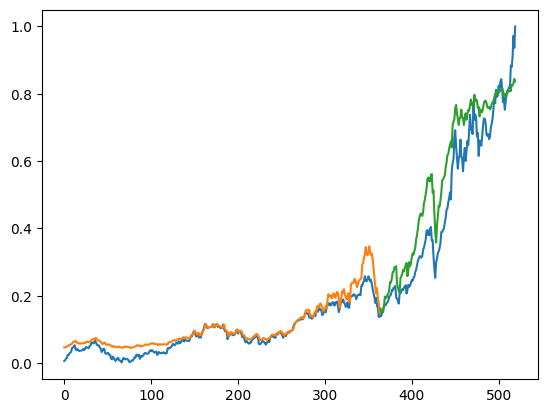

In [ ]:
y_pred = model.predict(X)
train_ypred = y_pred[:train_size]
test_ypred = y_pred[train_size:]
import matplotlib.pyplot as plt
plt.plot(range(len(y)), y)
plt.plot(range(train_size), train_ypred)
plt.plot(range(train_size,len(y)), test_ypred)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, LSTM, Dense
model = Sequential()
model.add(GRU(units=10, activation='tanh', return_sequences=True, input_shape=((time_step, 1))))
model.add(GRU(units=10, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='MSE', optimizer='adam', metrics=['mean_absolute_error'])
history_gru = model.fit(X_train, y_train, epochs=5, batch_size=1)
y_pred = model.predict(X_train)

Epoch 1/5
365/365 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0484 - mean_absolute_error: 0.1645
Epoch 2/5
365/365 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0033 - mean_absolute_error: 0.0466
Epoch 3/5
365/365 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 3.1421e-04 - mean_absolute_error: 0.0143
Epoch 4/5
365/365 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 2.2068e-04 - mean_absolute_error: 0.0120
Epoch 5/5
365/365 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.9705e-04 - mean_absolute_error: 0.0114
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


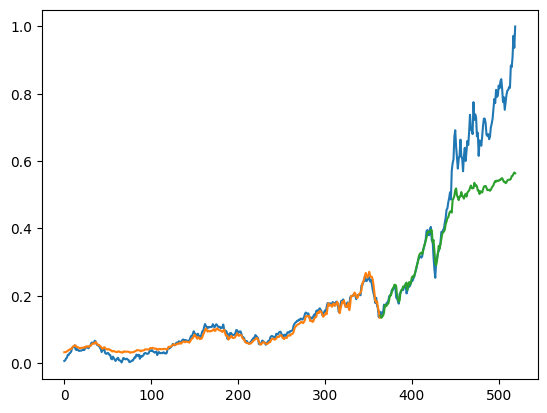

In [ ]:
y_pred = model.predict(X)
train_ypred = y_pred[:train_size]
test_ypred = y_pred[train_size:]
import matplotlib.pyplot as plt
plt.plot(range(len(y)), y)
plt.plot(range(train_size), train_ypred)
plt.plot(range(train_size,len(y)), test_ypred)

it is the best model here for following the test data

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


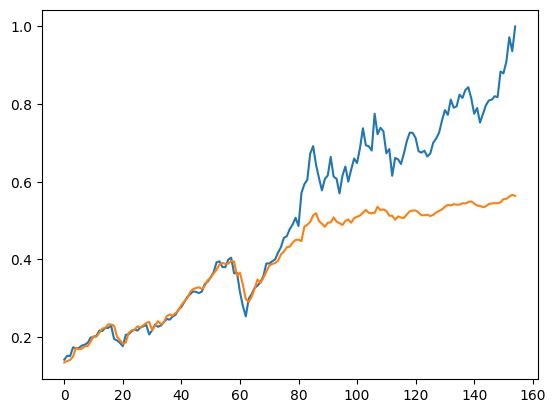

In [ ]:
y_pred = model.predict(X_test)
import matplotlib.pyplot as plt
plt.plot(range(len(y_test)), y_test)
plt.plot(range(len(y_pred)), y_pred)

In [ ]:
model = Sequential()
model.add(LSTM(units=24, activation='tanh', return_sequences=True, input_shape=((time_step, 1))))
model.add(LSTM(units=24, activation='tanh', return_sequences=True))
model.add(LSTM(units=10, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='MSE', optimizer='adam', metrics=['mean_absolute_error'])
history_lstm =  model.fit(X_train, y_train, epochs=5, batch_size=1)


Epoch 1/5
365/365 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.0569 - mean_absolute_error: 0.1761
Epoch 2/5
365/365 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0040 - mean_absolute_error: 0.0511
Epoch 3/5
365/365 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0483
Epoch 4/5
365/365 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 5.7949e-04 - mean_absolute_error: 0.0196
Epoch 5/5
365/365 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 2.7383e-04 - mean_absolute_error: 0.0133


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


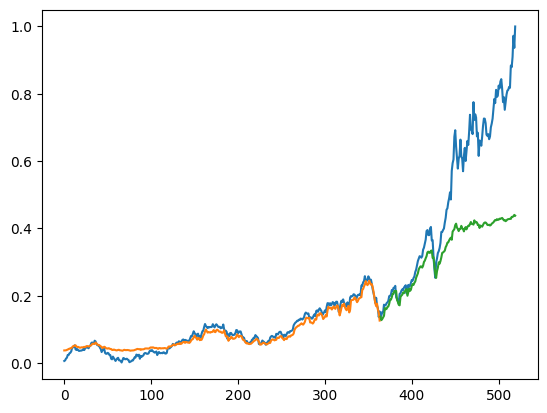

In [ ]:
y_pred = model.predict(X)
train_ypred = y_pred[:train_size]
test_ypred = y_pred[train_size:]
import matplotlib.pyplot as plt
plt.plot(range(len(y)), y)
plt.plot(range(train_size), train_ypred)
plt.plot(range(train_size,len(y)), test_ypred)

In [ ]:


model = Sequential()
model.add(LSTM(units=50, activation='tanh', return_sequences=True, input_shape=((time_step, 1))))
model.add(Dropout(0.2))
model.add(LSTM(units=50, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='MSE', optimizer='adam', metrics=['mean_absolute_error'])
model.fit(X_train, y_train, epochs=60, batch_size=32)


Epoch 1/60
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - loss: 0.1667 - mean_absolute_error: 0.4037
Epoch 2/60
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1010 - mean_absolute_error: 0.3061
Epoch 3/60
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0075 - mean_absolute_error: 0.0707
Epoch 4/60
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0097 - mean_absolute_error: 0.0772
Epoch 5/60
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0092 - mean_absolute_error: 0.0750
Epoch 6/60
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0072 - mean_absolute_error: 0.0633
Epoch 7/60
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0042 - mean_absolute_error: 0.0519
Epoch 8/60
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0046 - mean_absolute_error: 0.0563
Epoch 9/60
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0044 - mean_absolute_error: 0.0535
Epoch 10/60
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0045 - mean_absolute_error: 0.0544
Epoch 11/60
12/12 ━━━━━━━━━━━━━━━━━━━━ 

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step


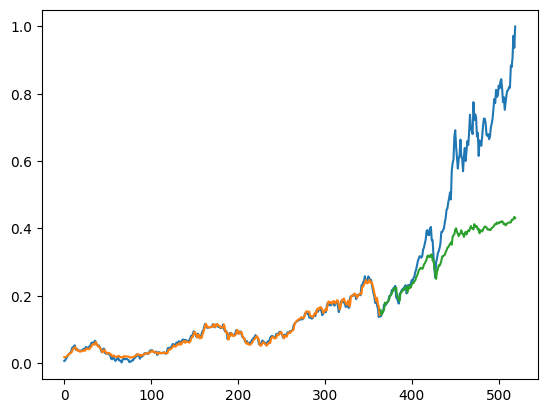

In [ ]:
y_pred = model.predict(X)
train_ypred = y_pred[:train_size]
test_ypred = y_pred[train_size:]
import matplotlib.pyplot as plt
plt.plot(range(len(y)), y)
plt.plot(range(train_size), train_ypred)
plt.plot(range(train_size,len(y)), test_ypred)

In [ ]:
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import SGD,Adam,RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau
model = Sequential()
model.add(Bidirectional(GRU(units=10, activation='tanh', return_sequences=True, input_shape=((time_step, 1)))))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))
model.add(Bidirectional(GRU(units=10, activation='tanh', return_sequences=False)))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))
# model.add(Bidirectional(GRU(units=2, activation='tanh', return_sequences=False)))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# opt = RMSprop(learning_rate=0.001, weight_decay=1e-4)
#adam = Adam(learning_rate=0.001)
model.compile(loss='MSE', optimizer='adam', metrics=['mean_absolute_error', "mean_absolute_percentage_error", "r2_score"])
model.summary()

reduce_lr = ReduceLROnPlateau(monitor='val_loss',  # Monitor validation loss
                              factor=0.5,          # Reduce learning rate by half
                              patience=3,          # Wait for 3 epochs with no improvement
                              verbose=1,           # Print learning rate changes
                              mode='min',          # Reduce when the monitored metric stops decreasing
                              min_delta=1e-4,      # Minimum change to qualify as an improvement
                              cooldown=2,          # Wait 2 epochs after reducing LR before resuming normal operations
                              min_lr=1e-6)         # Do not let the learning rate drop below 1e-6
model.fit(X_train, y_train, epochs=5, batch_size=1,  callbacks=[reduce_lr])


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional_2 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
365/365 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - loss: 0.0427 - mean_absolute_error: 0.1540 - mean_absolute_percentage_error: 408.7807 - r2_score: -26.4712 - learning_rate: 0.0010
Epoch 2/5
 13/365 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0041 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 84.0039 - r2_score: 0.0457

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_absolute_error,mean_absolute_percentage_error,r2_score,learning_rate.
  callback.on_epoch_end(epoch, logs)


365/365 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0022 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 134.1966 - r2_score: 0.3927 - learning_rate: 0.0010
Epoch 3/5
365/365 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 2.3734e-04 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 45.0995 - r2_score: 0.9371 - learning_rate: 0.0010
Epoch 4/5
365/365 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 1.4818e-04 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 44.7630 - r2_score: 0.9621 - learning_rate: 0.0010
Epoch 5/5
365/365 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 9.2627e-05 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 28.3139 - r2_score: 0.9639 - learning_rate: 0.0010


If the model is not overfitting, regularization techniques like Dropout and Batch Normalization may hinder learning by introducing unnecessary noise or normalizing activations that do not need it.

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


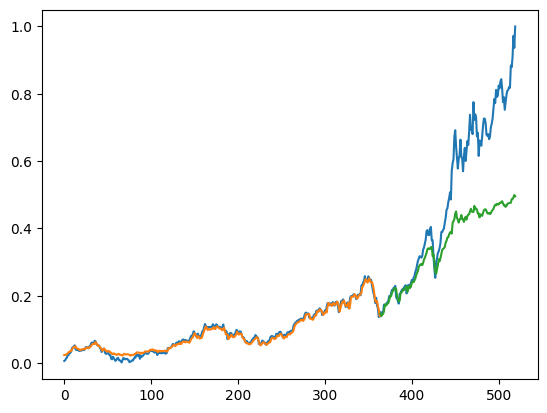

In [ ]:
y_pred = model.predict(X)
train_ypred = y_pred[:train_size]
test_ypred = y_pred[train_size:]
import matplotlib.pyplot as plt
plt.plot(range(len(y)), y)
plt.plot(range(train_size), train_ypred)
plt.plot(range(train_size,len(y)), test_ypred)

a simple model of gru is working better than others

after a period the test cant follow the train.

more epochs not help to get better following

batch size is so sensitive

we can use hyperparameter tuning, k fold cross validation to get better results with regressors

In [ ]:
def plot_model_comparison(histories, labels):

    plt.figure(figsize=(14, 6))

    # Plotting Training Loss
    plt.subplot(1, 2, 1)
    for i, history in enumerate(histories):
        plt.plot(history.history['loss'], label=f'{labels[i]} - Training Loss')
    plt.title('Training Loss Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plotting Validation Loss
    plt.subplot(1, 2, 2)
    for i, history in enumerate(histories):
        plt.plot(history.history['mean_absolute_error'], label=f'{labels[i]} - Validation Loss')
    plt.title('mean_absolute_error Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

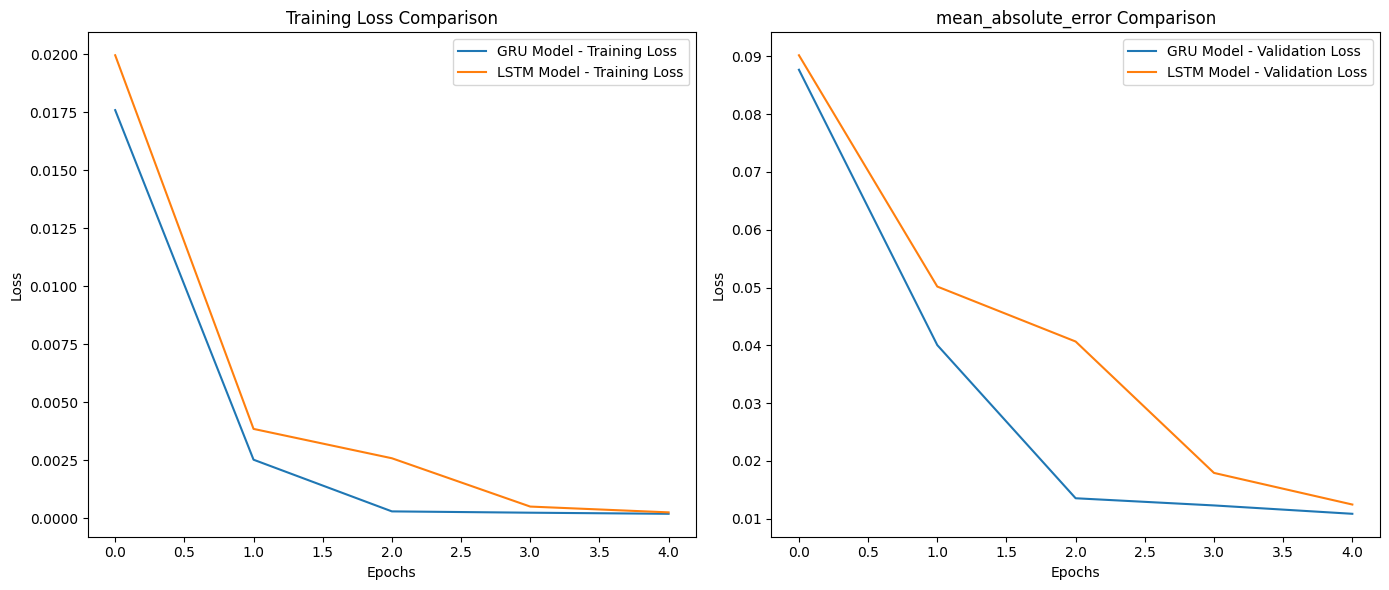

In [ ]:
plot_model_comparison([history_gru, history_lstm], ['GRU Model', 'LSTM Model'])


Results are different because of various initial points,by the way, the GRU models follows longer, lstm is in the second place then simple rnn is the last one, but i think lstm and simple rnn are useful for short periods in my tested models not in general.